# Zero Shot Script 

#### Author : Advaith Shankar

General Information : Make sure you've set up ollama on your local and downloaded the specific model you want to run from the ollama platform using terminal

## Set up 

In [1]:
import pandas as pd
import ollama 
import os

In [2]:
ollama.pull('') #Specify the llm model on your local. For example in this case it was 'llava:13b'

ProgressResponse(status='success', completed=None, total=None, digest=None)

# For Apples

## Bad Apples

In [3]:
image_folder = '' #Specify path name with all images 

In [4]:
image_paths = [
    os.path.join(image_folder, filename)
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
]

In [5]:
results = []
for image_path in image_paths:
    task = {
        'role': 'user',
        'content': 'Please classify this image as whether the apple is a good apple or a bad apple. I want the response only to be good apple or bad apple, Nothing more than that.',
        'images': [image_path]
    }
    messages = [task]

    
    response = ollama.chat(
        model='', #Specify Model Name here as well 
        messages=messages,
        keep_alive=10
    )

    
    classification = response['message']['content'].strip()
    results.append({'image': image_path, 'classification': classification})


for result in results:
    print(f"Image: {result['image']} -> Classification: {result['classification']}\n")

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenapples/rotated_by_60_Screen Shot 2018-06-08 at 2.35.25 PM.png -> Classification: Bad apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenapples/saltandpepper_Screen Shot 2018-06-08 at 2.36.23 PM.png -> Classification: Good apple.

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenapples/rotated_by_15_Screen Shot 2018-06-08 at 2.46.44 PM.png -> Classification: Good apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenapples/rotated_by_45_Screen Shot 2018-06-08 at 2.46.36 PM.png -> Classification: The image shows an apple with visible signs of decay or spoilage. There are dark spots on its surface and possibly some mold growth. Based on this visual inspection, it could be classified as a bad apple 

In [6]:
df_results = pd.DataFrame(results)

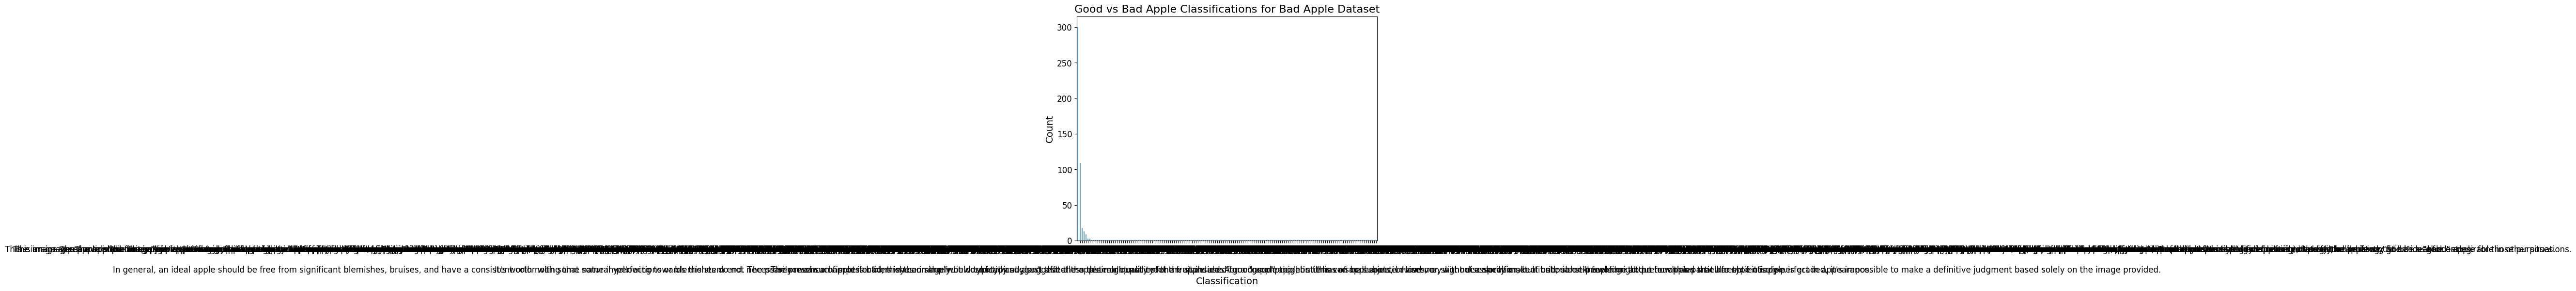

In [7]:
import matplotlib.pyplot as plt

# Count the number of "Good apple" and "Bad apple" classifications
classification_counts = df_results['classification'].value_counts()

# Plot the data as a bar chart
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar', alpha=0.7)

# Customize the plot
plt.title('Good vs Bad Apple Classifications for Bad Apple Dataset', fontsize=16)
plt.xlabel('Classification', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

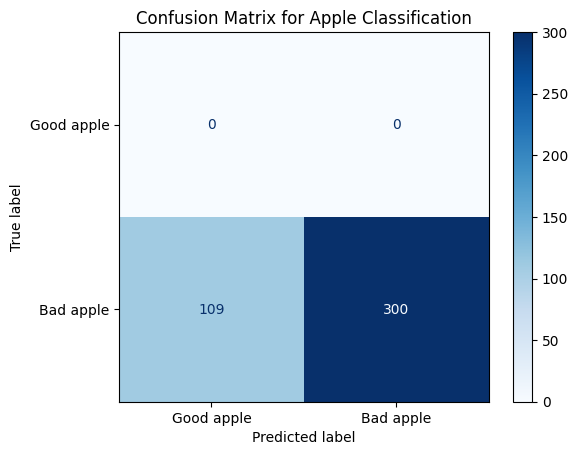

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the true labels (all "Bad apple")
true_labels = ["Bad apple"] * len(df_results)

# Extract the predicted labels from the DataFrame
predicted_labels = df_results['classification'].tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["Good apple", "Bad apple"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good apple", "Bad apple"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add a title
plt.title("Confusion Matrix for Apple Classification")
plt.show()

<br>

## Good Apples

In [9]:
image_folder = '/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshapples'

In [10]:
image_paths = [
    os.path.join(image_folder, filename)
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
]

In [11]:
results = []
for image_path in image_paths:
    task = {
        'role': 'user',
        'content': 'Please classify this image as whether the apple is a good apple or a bad apple. I want the response only to be good apple or bad apple, Nothing more than that.',
        'images': [image_path]
    }
    messages = [task]

    
    response = ollama.chat(
        model='llava:13b',
        messages=messages,
        keep_alive=10
    )

    
    classification = response['message']['content'].strip()
    results.append({'image': image_path, 'classification': classification})


for result in results:
    print(f"Image: {result['image']} -> Classification: {result['classification']}\n")

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.02.43 PM.png -> Classification: Good apple.

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshapples/saltandpepper_Screen Shot 2018-06-08 at 5.10.11 PM.png -> Classification: Good apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshapples/rotated_by_30_Screen Shot 2018-06-08 at 5.26.41 PM.png -> Classification: Good apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.28.59 PM.png -> Classification: Good apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.02.54 PM.png -> Classification: Good apple

Image: /

In [12]:
df_results = pd.DataFrame(results)

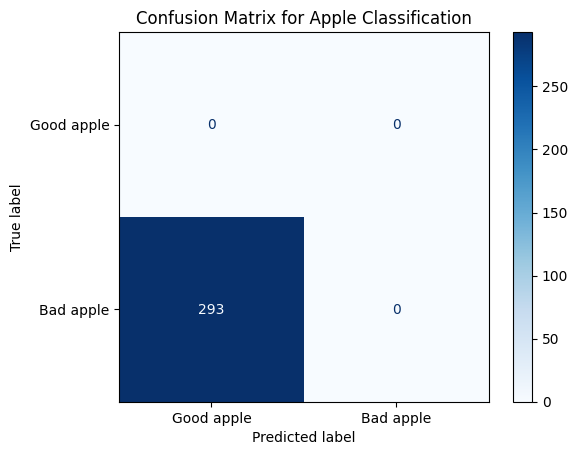

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the true labels (all "Bad apple")
true_labels = ["Bad apple"] * len(df_results)

# Extract the predicted labels from the DataFrame
predicted_labels = df_results['classification'].tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["Good apple", "Bad apple"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good apple", "Bad apple"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add a title
plt.title("Confusion Matrix for Apple Classification")
plt.show()

<br>

# For Oranges

### Bad Oranges

In [14]:
image_folder = '/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenoranges'

In [15]:
image_paths = [
    os.path.join(image_folder, filename)
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
]

In [16]:
results = []
for image_path in image_paths:
    task = {
        'role': 'user',
        'content': 'Classify this image as whether the orange is a good orange or a bad orange. I want the response only to be good orange or bad orange (like a binary classification), Nothing more than that.',
        'images': [image_path]
    }
    messages = [task]

    
    response = ollama.chat(
        model='llava:13b',
        messages=messages,
        keep_alive=10
    )

    
    classification = response['message']['content'].strip()
    results.append({'image': image_path, 'classification': classification})


for result in results:
    print(f"Image: {result['image']} -> Classification: {result['classification']}\n")

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenoranges/rotated_by_75_Screen Shot 2018-06-12 at 11.36.35 PM.png -> Classification: Bad orange

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenoranges/vertical_flip_Screen Shot 2018-06-12 at 11.40.11 PM.png -> Classification: Bad orange

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenoranges/translation_Screen Shot 2018-06-12 at 11.25.25 PM.png -> Classification: Bad orange

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.19.01 PM.png -> Classification: Bad orange

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenoranges/rotated_by_30_Screen Shot 2018-06-12 at 11.20.18 PM.png -> Classifica

In [17]:
df_results = pd.DataFrame(results)

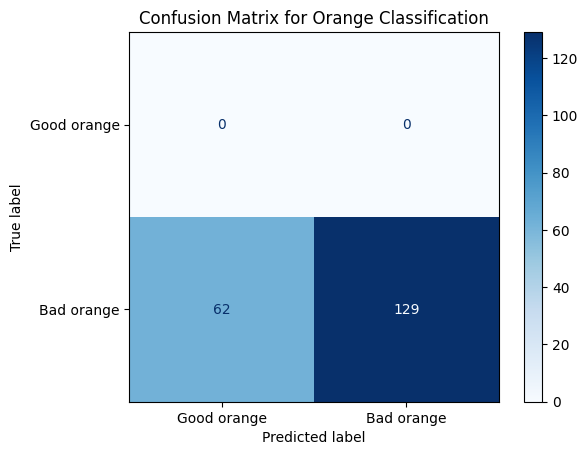

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the true labels (all "Bad apple")
true_labels = ["Bad orange"] * len(df_results)

# Extract the predicted labels from the DataFrame
predicted_labels = df_results['classification'].tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["Good orange", "Bad orange"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good orange", "Bad orange"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add a title
plt.title("Confusion Matrix for Orange Classification")
plt.show()

### Good Oranges

In [19]:
image_folder = '/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshoranges'

In [20]:
image_paths = [
    os.path.join(image_folder, filename)
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
]

In [21]:
results = []
for image_path in image_paths:
    task = {
        'role': 'user',
        'content': 'Classify this image as whether the orange is a good orange or a bad orange. I want the response only to be good orange or bad orange (like a binary classification), Nothing more than that.',
        'images': [image_path]
    }
    messages = [task]

    
    response = ollama.chat(
        model='llava:13b',
        messages=messages,
        keep_alive=10
    )

    
    classification = response['message']['content'].strip()
    results.append({'image': image_path, 'classification': classification})


for result in results:
    print(f"Image: {result['image']} -> Classification: {result['classification']}\n")

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshoranges/vertical_flip_Screen Shot 2018-06-12 at 11.50.28 PM.png -> Classification: The image shows two oranges, and while both appear ripe and without significant damage, it's important to note that determining whether an orange is "good" or "bad" can depend on various factors such as the intended use of the orange (eating, cooking, juicing), personal preferences in terms of size and texture, and even seasonal variations. Generally, good oranges would have a vibrant color without any significant blemishes or bruises, and they should feel firm to the touch. However, without more context, I can only provide a general assessment based on appearance alone:

Both of these oranges appear to be ripe with no visible damage or major imperfections. They would likely be considered "good" oranges in terms of appearance.

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advance

In [22]:
df_results = pd.DataFrame(results)

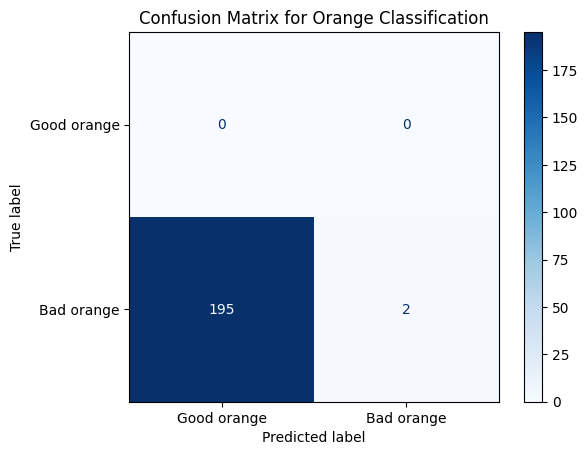

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the true labels (all "Bad apple")
true_labels = ["Bad orange"] * len(df_results)

# Extract the predicted labels from the DataFrame
predicted_labels = df_results['classification'].tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["Good orange", "Bad orange"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good orange", "Bad orange"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add a title
plt.title("Confusion Matrix for Orange Classification")
plt.show()

<br>

# For Bananas

## Bad Bananas

In [24]:
image_folder = '/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenbanana'

In [25]:
image_paths = [
    os.path.join(image_folder, filename)
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
]

In [26]:
results = []
for image_path in image_paths:
    task = {
        'role': 'user',
        'content': 'Classify this image as whether the banana is a good banana or a bad banana. I want the response only to be good banana or bad banana (like a binary classification), Nothing more than that. It is strict instructions that I want your output to be only good banana or bad banana',
        'images': [image_path]
    }
    messages = [task]

    
    response = ollama.chat(
        model='', #Specify model name again
        messages=messages,
        keep_alive=10
    )

    
    classification = response['message']['content'].strip()
    results.append({'image': image_path, 'classification': classification})


for result in results:
    print(f"Image: {result['image']} -> Classification: {result['classification']}\n")

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenbanana/translation_Screen Shot 2018-06-12 at 9.27.56 PM.png -> Classification: Good banana

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenbanana/Screen Shot 2018-06-12 at 9.10.20 PM.png -> Classification: Good banana

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenbanana/translation_Screen Shot 2018-06-12 at 9.16.47 PM.png -> Classification: The banana in the image appears to be overripe, as indicated by its dark color and some visible brown spots. This would typically classify it as a "bad banana."

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.16.57 PM.png -> Classification: Bad banana

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall

In [27]:
df_results = pd.DataFrame(results)

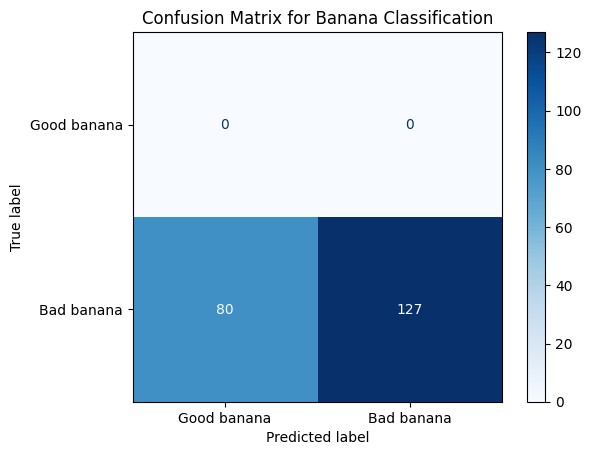

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the true labels (all "Bad banana")
true_labels = ["Bad banana"] * len(df_results)

# Extract the predicted labels from the DataFrame
predicted_labels = df_results['classification'].tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["Good banana", "Bad banana"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good banana", "Bad banana"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add a title
plt.title("Confusion Matrix for Banana Classification")
plt.show()

## Good Bananas

In [29]:
image_folder = '/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshbanana'

In [30]:
image_paths = [
    os.path.join(image_folder, filename)
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
]

In [31]:
results = []
for image_path in image_paths:
    task = {
        'role': 'user',
        'content': 'Classify this image as whether the banana is a good banana or a bad banana. I want the response only to be good banana or bad banana (like a binary classification), Nothing more than that. It is strict instructions that I want your output to be only good banana or bad banana',
        'images': [image_path]
    }
    messages = [task]

    
    response = ollama.chat(
        model='llava:13b',
        messages=messages,
        keep_alive=10
    )

    
    classification = response['message']['content'].strip()
    results.append({'image': image_path, 'classification': classification})


for result in results:
    print(f"Image: {result['image']} -> Classification: {result['classification']}\n")

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshbanana/rotated_by_75_Screen Shot 2018-06-12 at 9.58.07 PM.png -> Classification: Good banana

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.46.55 PM.png -> Classification: The banana in this image appears to be ripe and has a healthy yellow color, which typically indicates it's a good banana. However, without being able to smell or taste the banana, an absolute classification of "good" or "bad" can't be provided with certainty. It is important to note that visual assessment alone might not accurately reflect the fruit's quality or freshness.

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshbanana/rotated_by_30_Screen Shot 2018-06-12 at 9.49.45 PM.png -> Classification: Good banana

Image: /Users/advaith/Desktop/

In [32]:
df_results = pd.DataFrame(results)

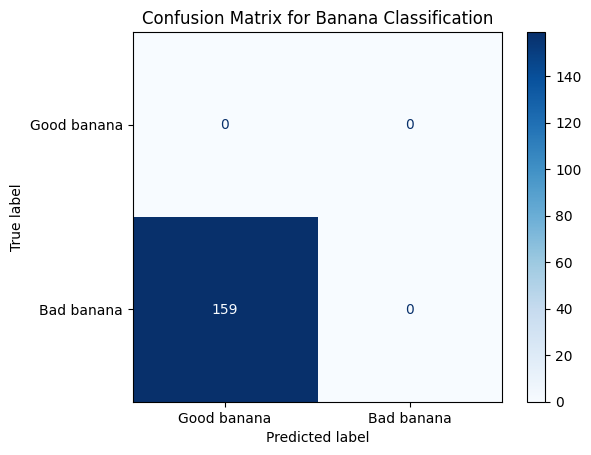

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the true labels (all "Bad banana")
true_labels = ["Bad banana"] * len(df_results)

# Extract the predicted labels from the DataFrame
predicted_labels = df_results['classification'].tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["Good banana", "Bad banana"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good banana", "Bad banana"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add a title
plt.title("Confusion Matrix for Banana Classification")
plt.show()